In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
anime = pd.read_csv('dataset/anime.csv')
display(anime.head(3))
print('Shape:', anime.shape)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


Shape: (12294, 7)


In [3]:
user = pd.read_csv('dataset/rating.csv')
display(user.head(3))
print('Shape:', user.shape)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1


Shape: (7813737, 3)


In [4]:
MRPU = user.groupby(['user_id']).mean().reset_index()
MRPU['mean_rating'] = MRPU['rating']

MRPU.drop(['anime_id', 'rating'], axis = 1, inplace=True)
MRPU.head(3)

,user_id,mean_rating
0,1,-0.712418
1,2,2.666667
2,3,7.382979


In [5]:
user = pd.merge(user, MRPU, on = ['user_id', 'user_id'])
user.head(3)

,user_id,anime_id,rating,mean_rating
0,1,20,-1,-0.712418
1,1,24,-1,-0.712418
2,1,79,-1,-0.712418


In [6]:
user = user.drop(user[user.rating < user.mean_rating].index)
display(user.head(3))
print('Shape:', user.shape)

,user_id,anime_id,rating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418


Shape: (4262566, 4)


In [7]:
user[user['user_id'] == 5]

,user_id,anime_id,rating,mean_rating
302,5,6,8,4.263383
303,5,15,6,4.263383
304,5,17,6,4.263383
305,5,18,6,4.263383
306,5,20,6,4.263383
...,...,...,...,...
762,5,30831,8,4.263383
763,5,31240,8,4.263383
765,5,31722,7,4.263383
767,5,32182,9,4.263383


In [8]:
len(user["user_id"].unique())

73515

In [9]:
# merge 2 dataset
mergedata = pd.merge(anime, user, on= ['anime_id', 'anime_id'])
mergedata = mergedata[mergedata.user_id <= 10000]
display(mergedata.head(3))
print('Shape:', mergedata.shape)

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y,mean_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,7.699301
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,8.729242
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,7.372287


Shape: (570939, 10)


In [10]:
print('Anime Length:', len(anime['anime_id'].unique()))
print('Anime Merged Length with 10000:', len(mergedata['anime_id'].unique()))

Anime Length: 12294
Anime Merged Length with 10000: 7040


In [11]:
user_anime = pd.crosstab(mergedata['user_id'], mergedata['name'])
display(user_anime.head(3))
print('Shape:', user_anime.shape)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,...,gdgd Fairies 2,gdgd Fairies Movie: tte Iu Eiga wa Dou kana...?,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Shape: (10000, 7040)


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca.fit(user_anime)
pca_samples = pca.transform(user_anime)

In [13]:
ps = pd.DataFrame(pca_samples)
display(ps.head(3))
print('Shape:', ps.shape)

,0,1,2
0,-1.569915,-0.485655,0.36716
1,-1.754950,-0.256719,0.10716
2,0.121423,-1.387667,-0.85492


Shape: (10000, 3)


In [14]:
tocluster = pd.DataFrame(ps[[0, 1, 2]])

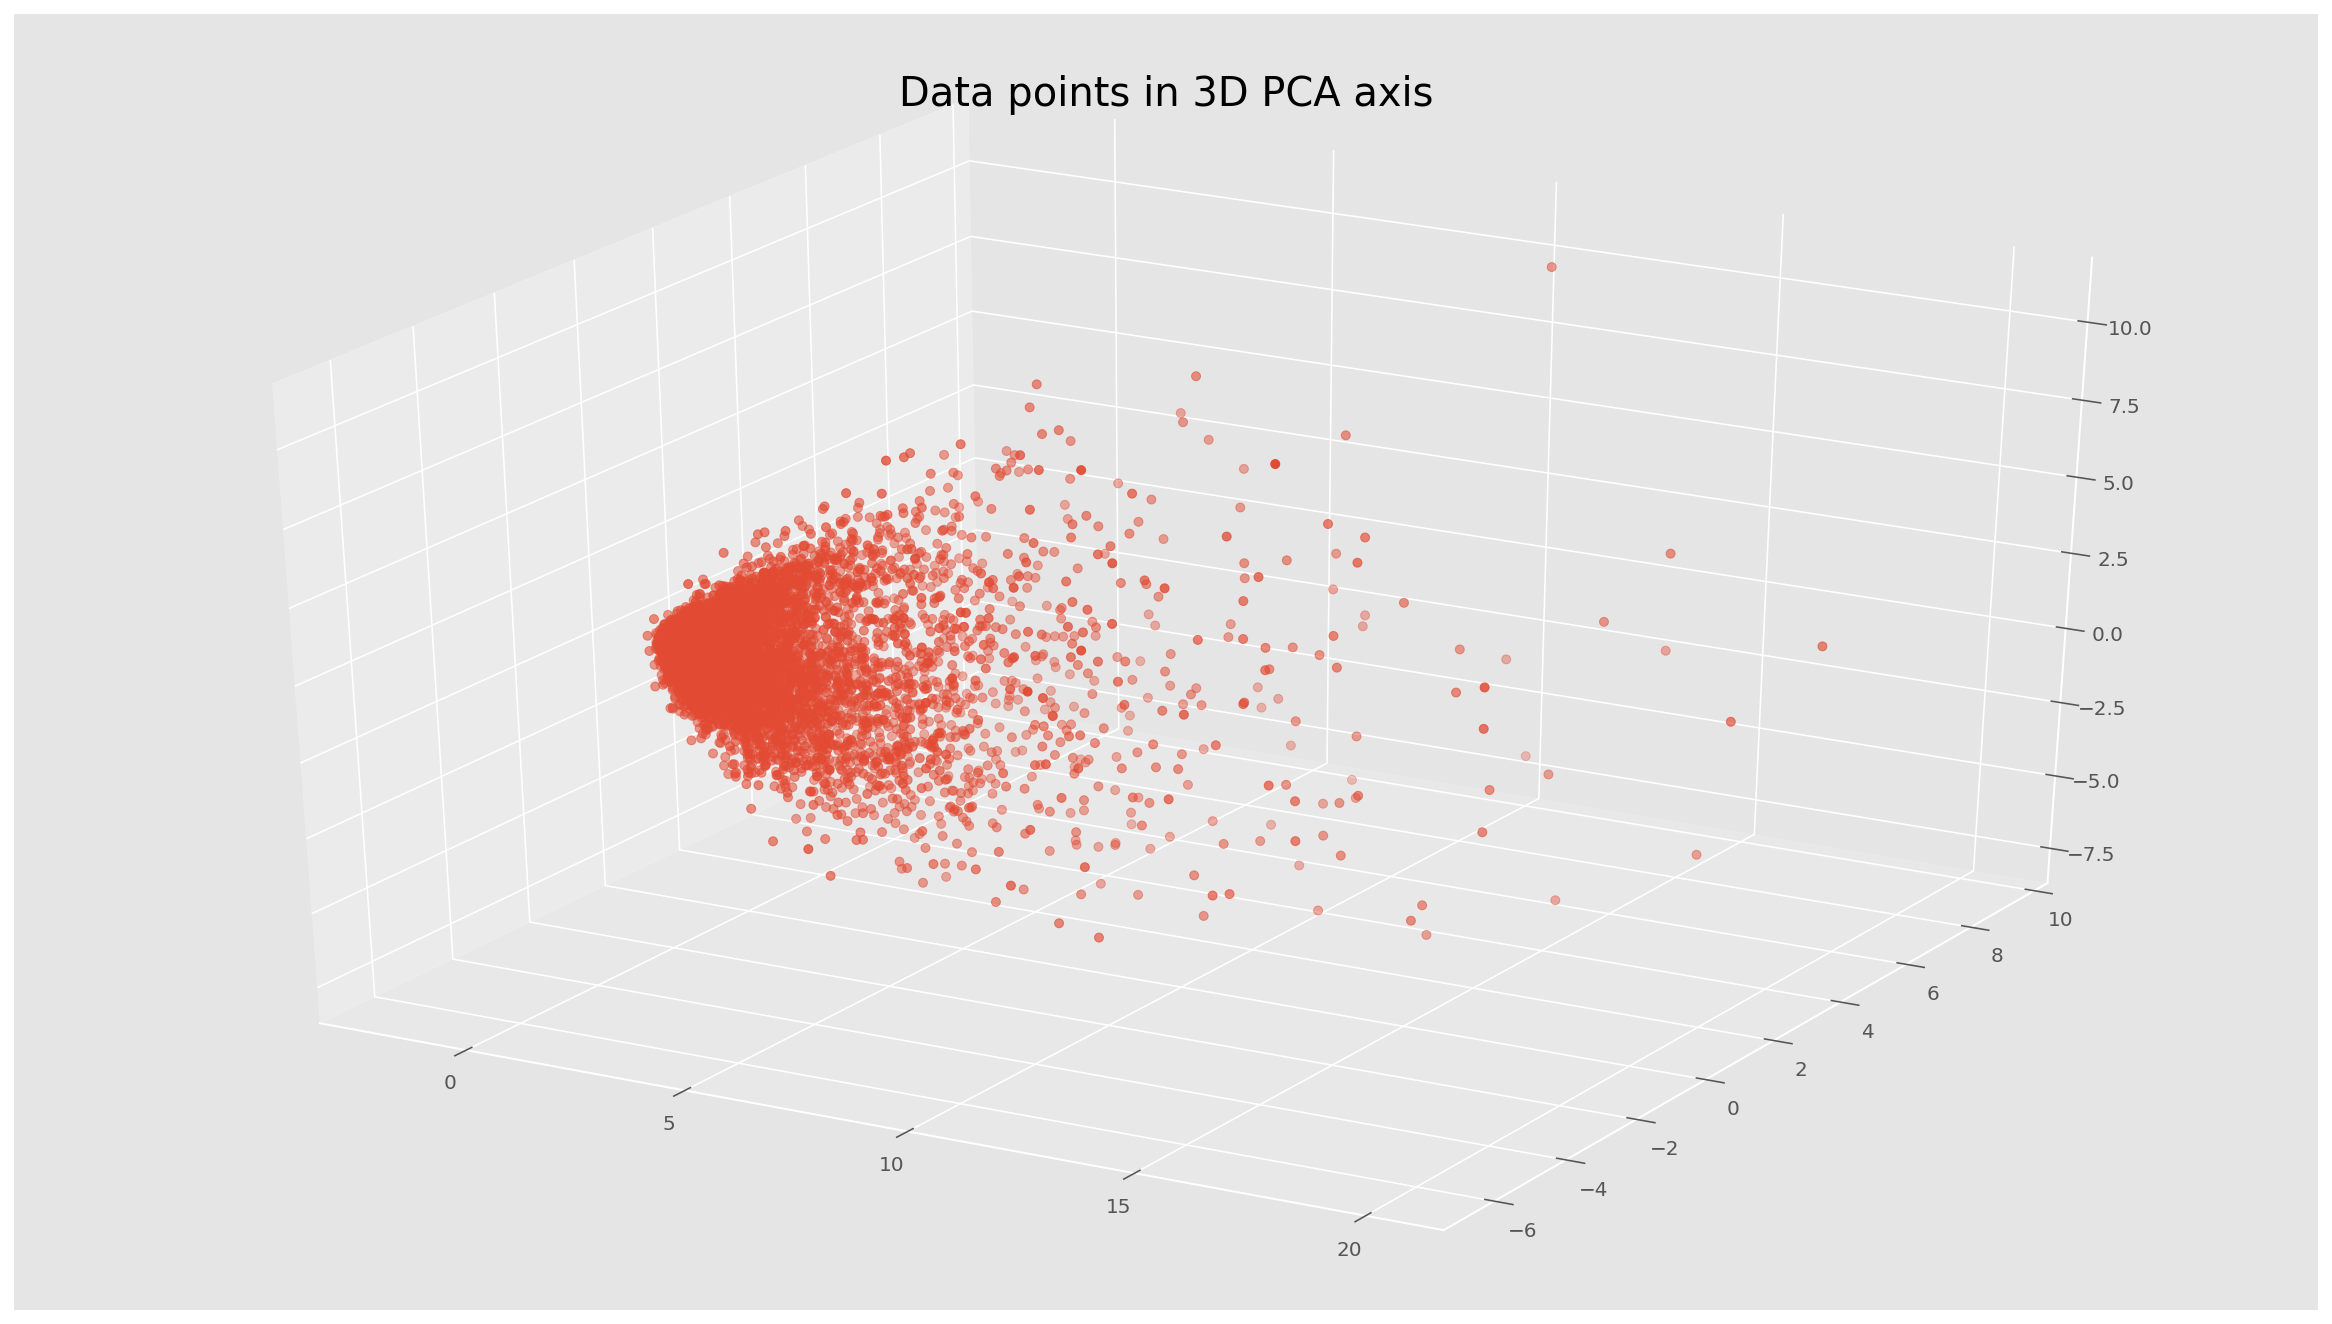

In [15]:
plt.rcParams['figure.figsize'] = (16, 9)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

In [16]:
import time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

scores, distortions = [None] * 8, [None] * 8
scores[0], scores[1], scores[2], distortions[0], distortions[1], distortions[2] = 0, 0, 0, 0, 0, 0

for i in range(3, 8):
    start = time.time()
    
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tocluster)
    scores[i] = silhouette_score(tocluster, kmeans.labels_)
    distortions[i] = sum(np.min(cdist(tocluster, kmeans.cluster_centers_,
                                        'euclidean'), axis = 1)) / tocluster.shape[0]
    
    time.sleep(1)
    end = time.time()
    print('Komputasi:', round((end - start), 5))

Komputasi: 3.12074
Komputasi: 3.00016
Komputasi: 3.24969
Komputasi: 3.53046
Komputasi: 3.11933


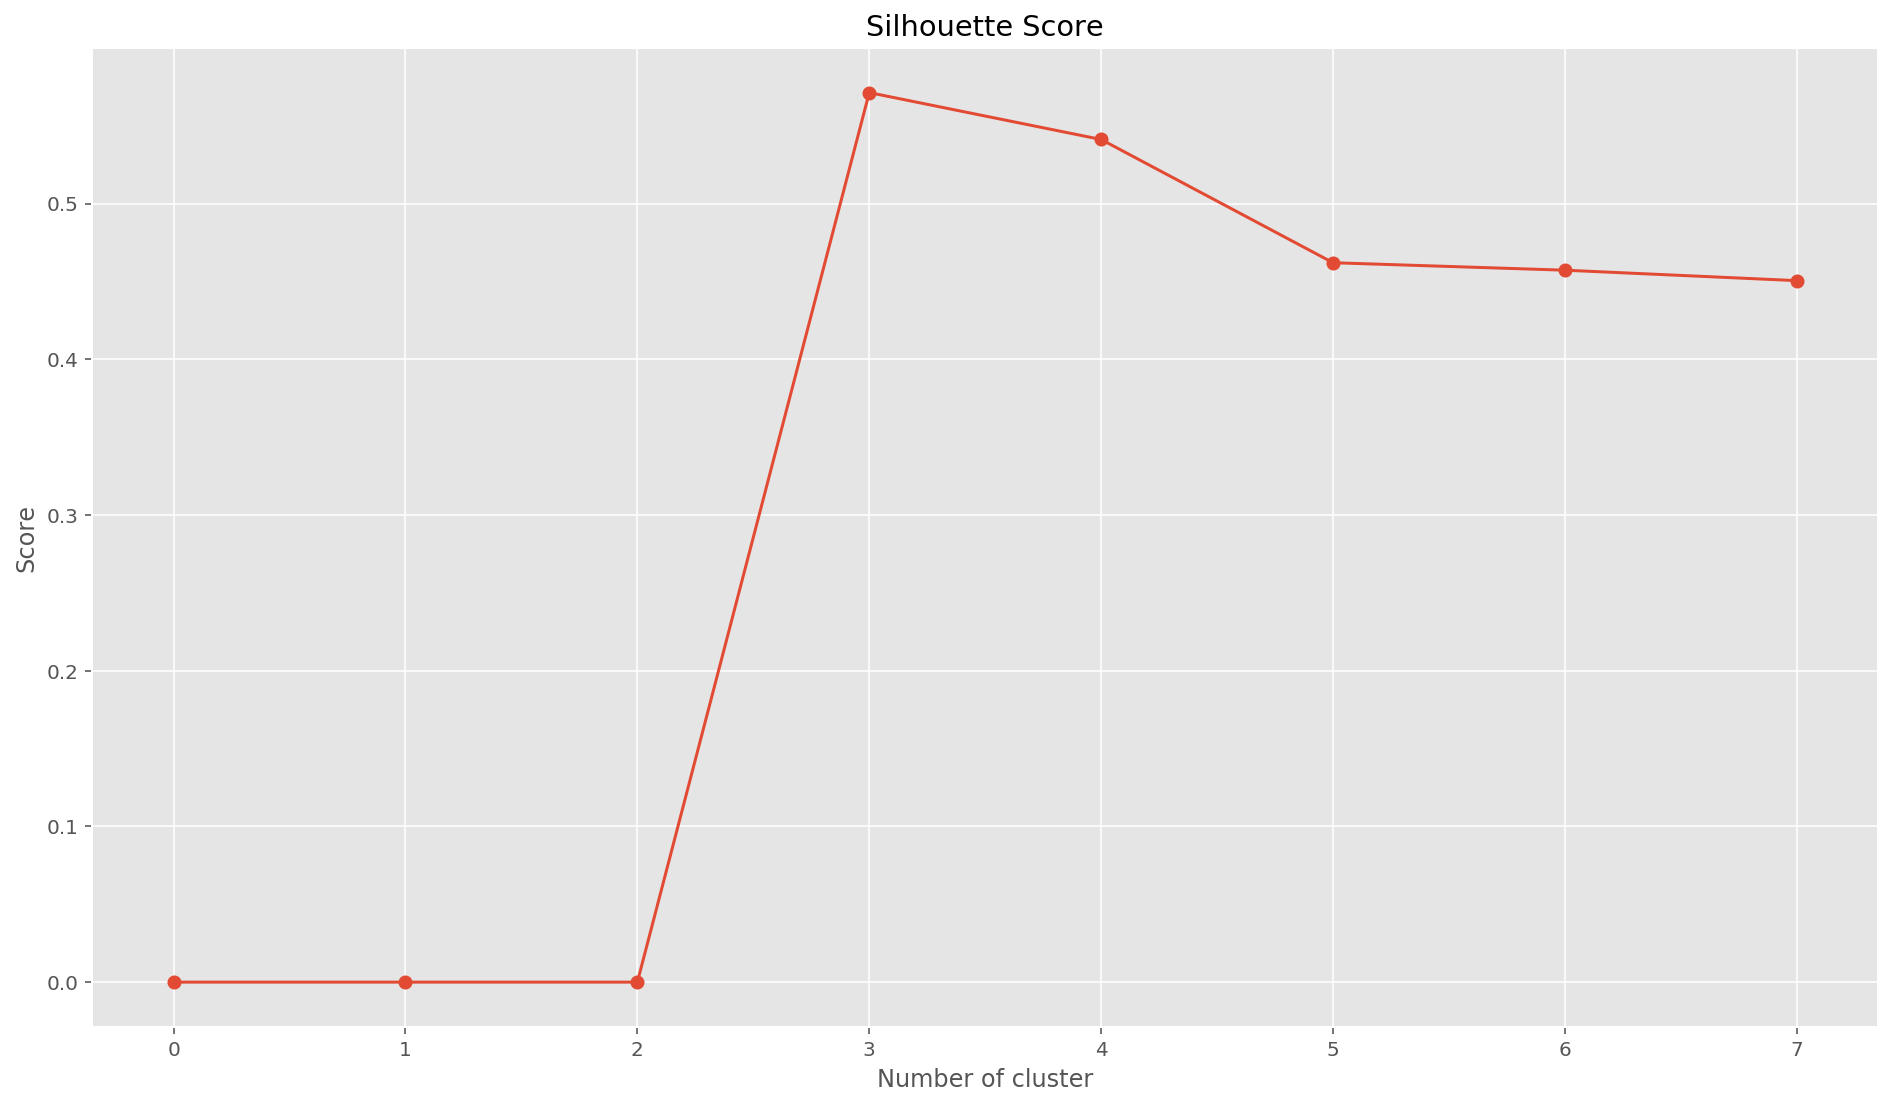

In [17]:
plt.plot(range(0 ,8), scores, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Score')
plt.title('Silhouette Score') 
plt.show()

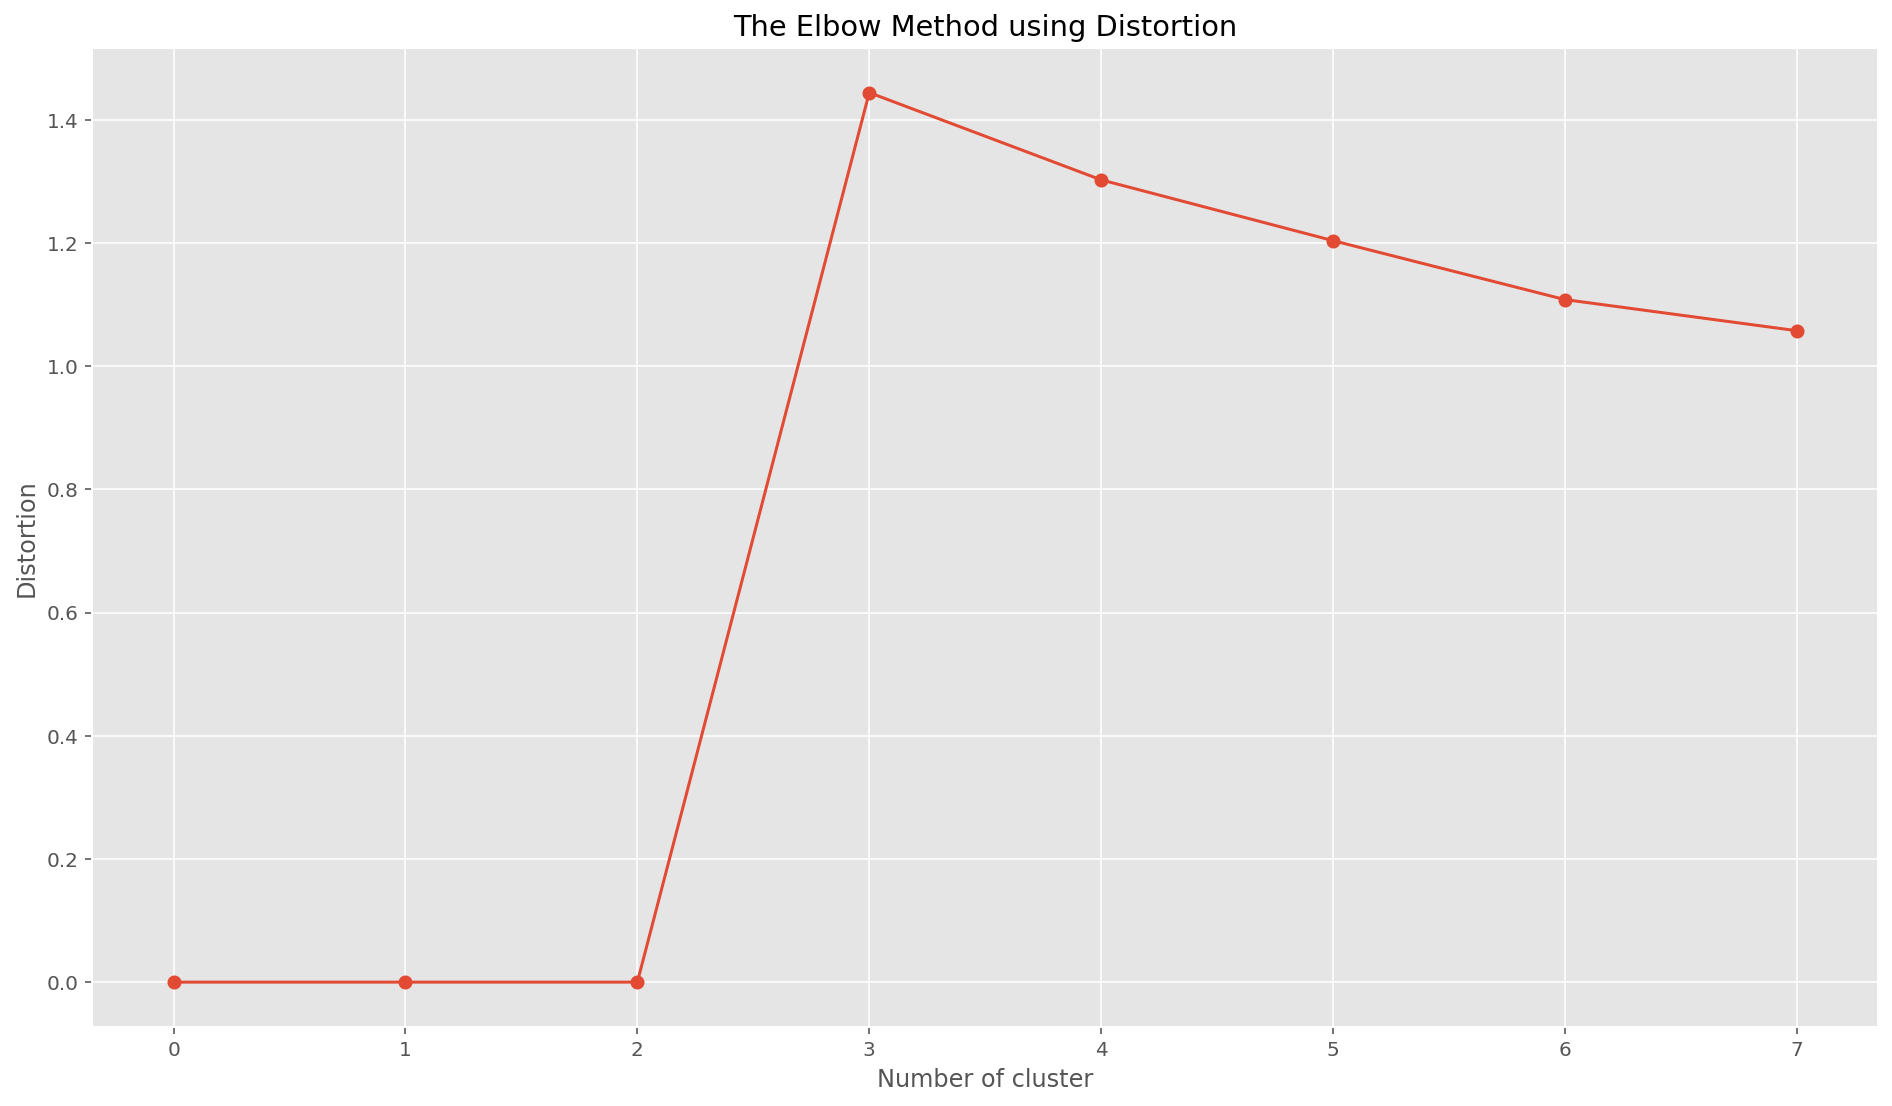

In [18]:
plt.plot(range(0 ,8), distortions, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [19]:
#best_k = scores.index(max(scores))
best_k = 3
best_k

3

In [20]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters = best_k, random_state = 0).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

centers

array([[ 4.29806344, -1.94945067,  0.08008284],
       [-0.87840018, -0.08996042,  0.01182758],
       [ 2.51597345,  2.26024992, -0.14948825]])

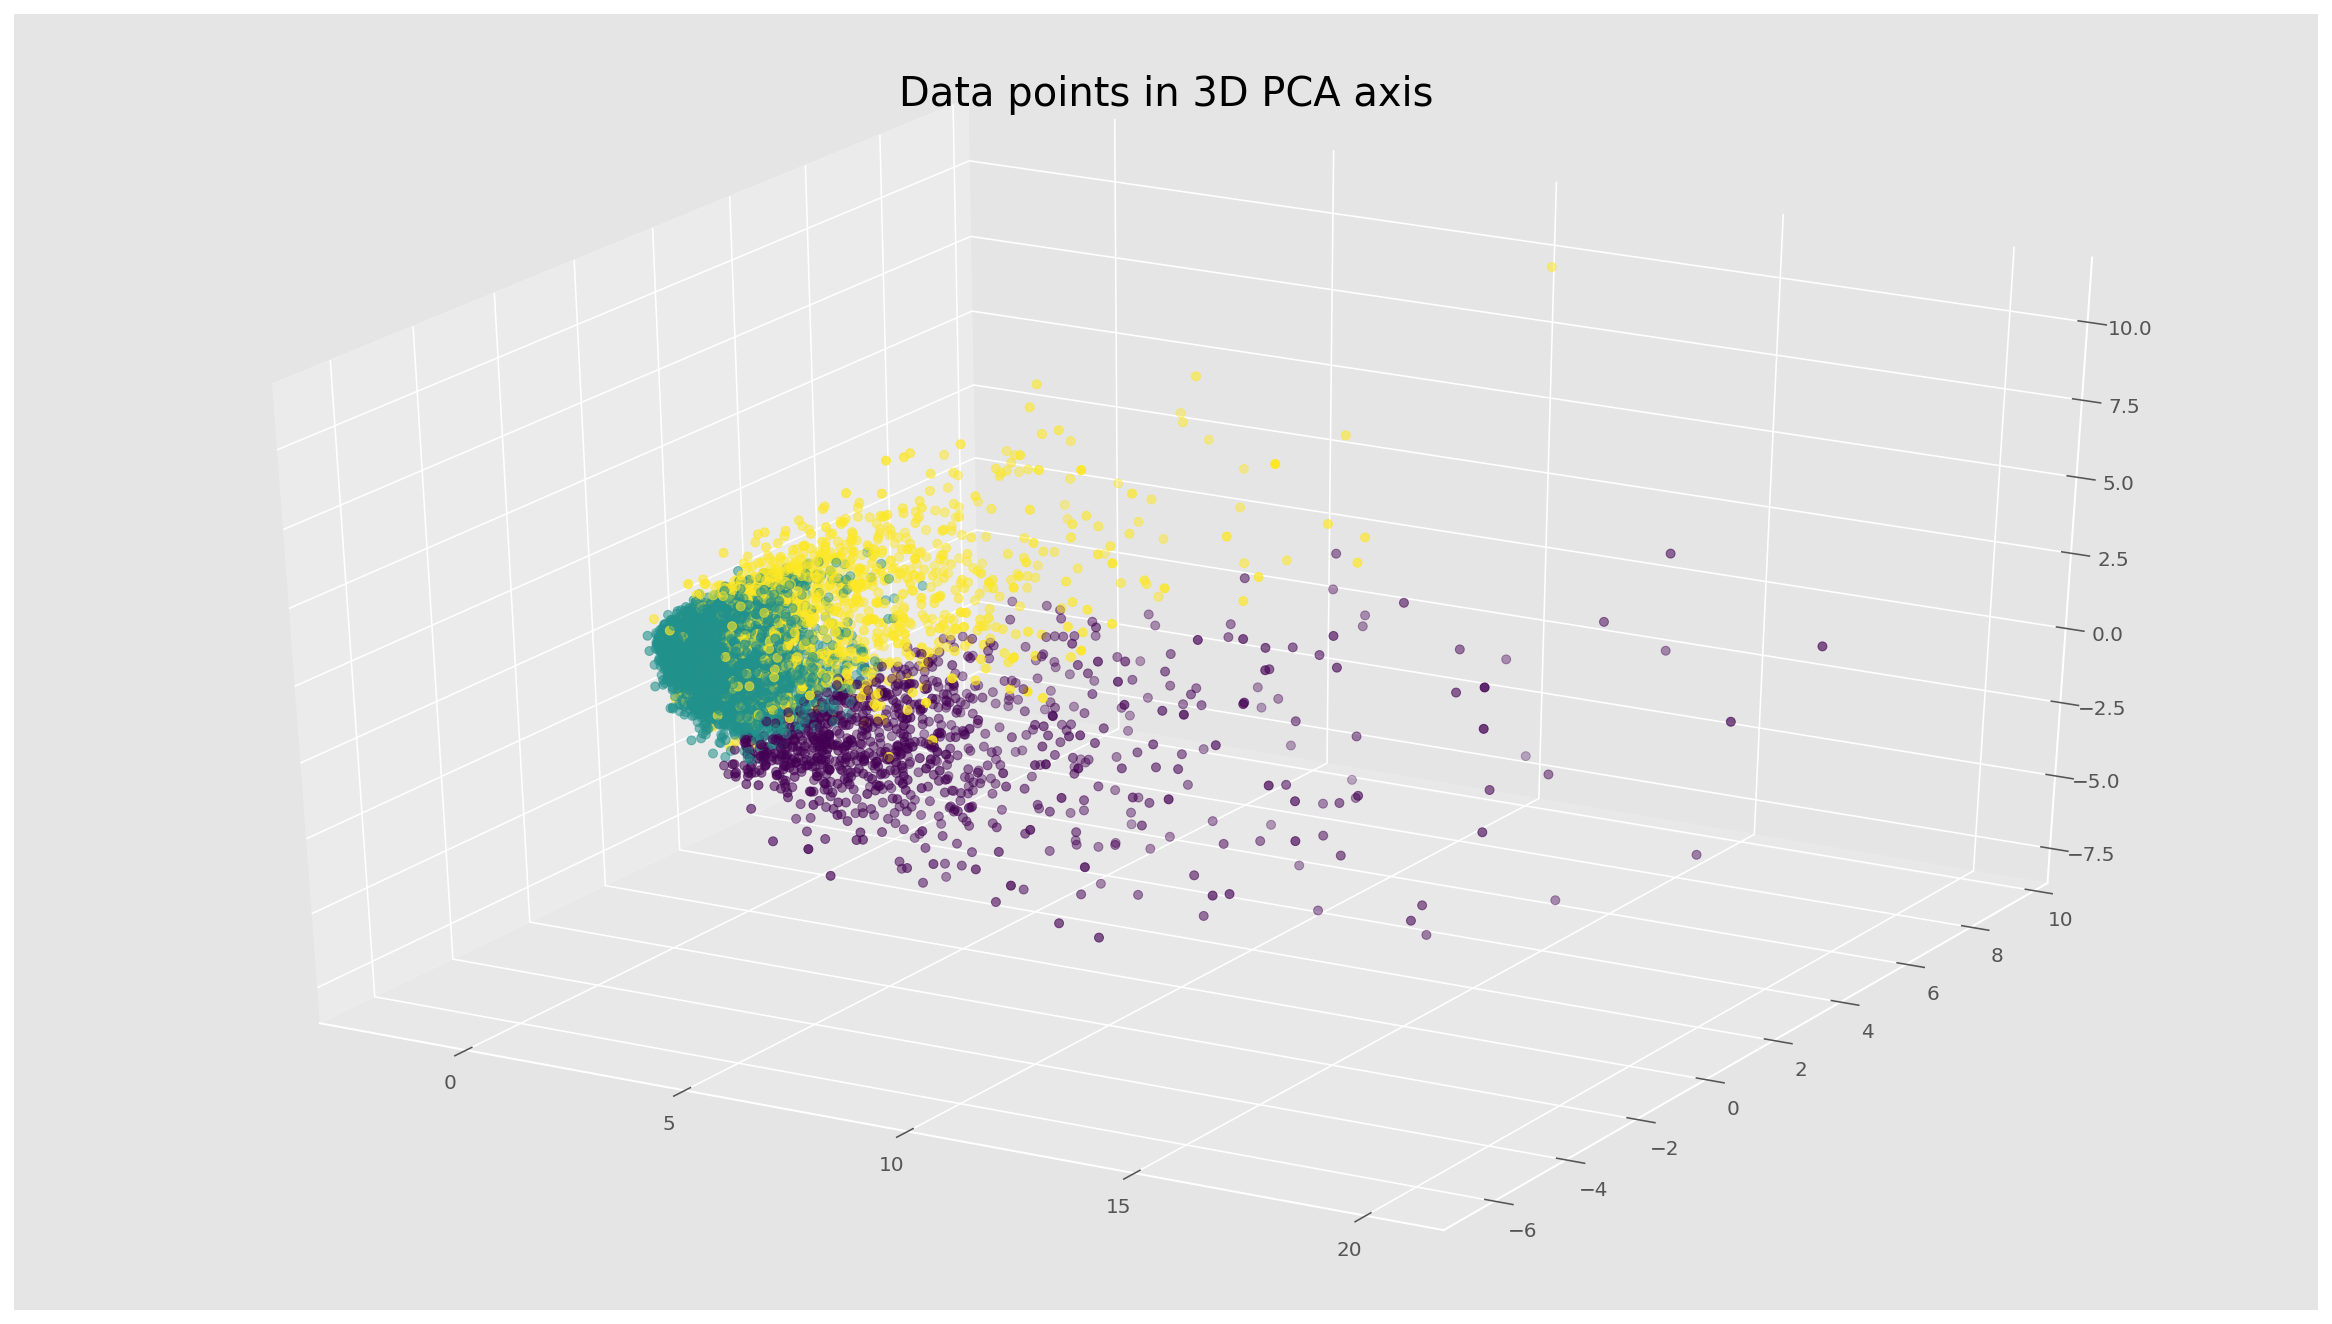

In [21]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=20)

plt.show()

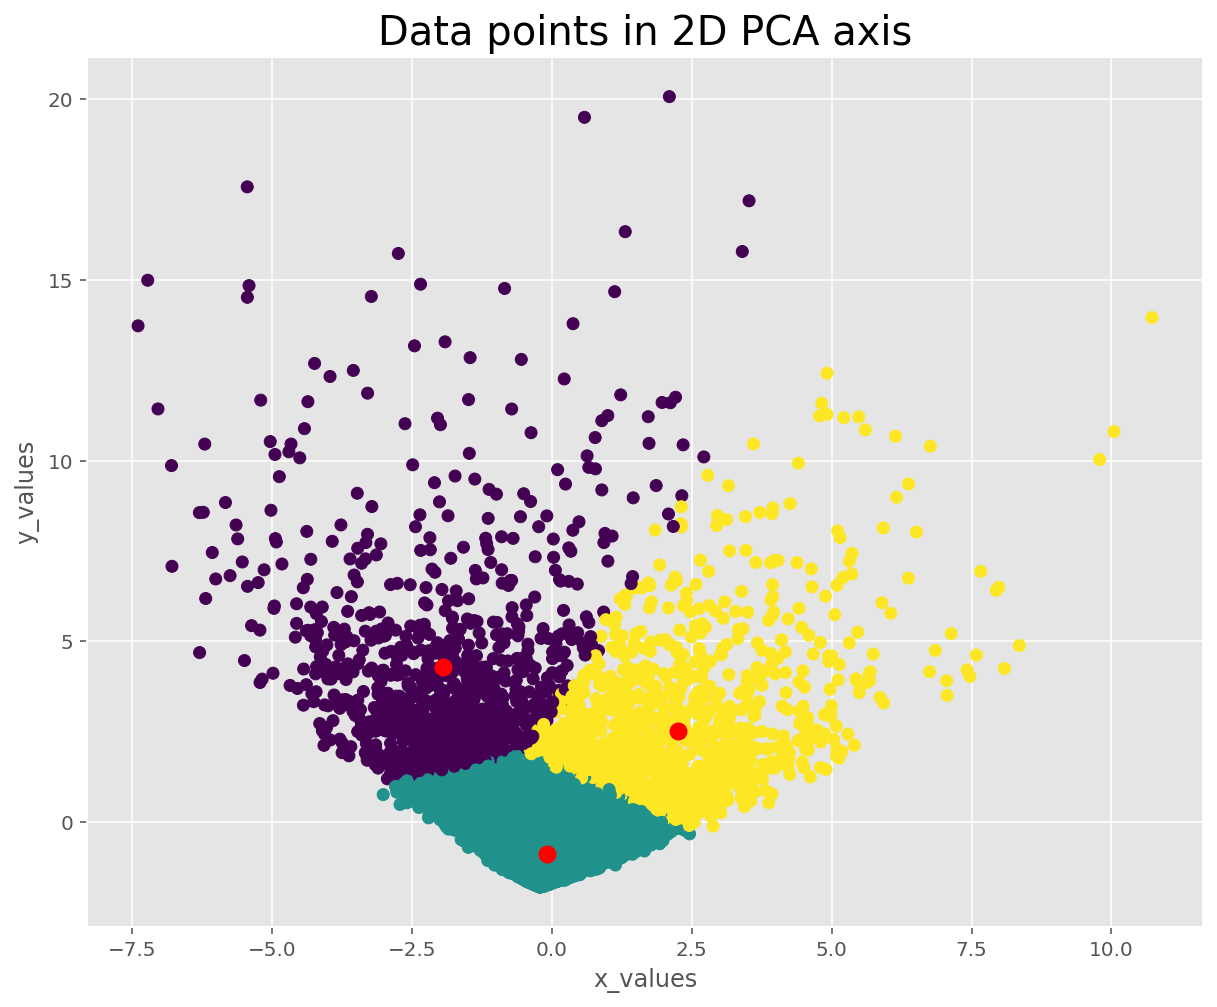

In [22]:
fig = plt.figure(figsize = (10, 8))
plt.scatter(tocluster[1], tocluster[0], c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize = 8, color = 'red', alpha = 1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize = 20)
plt.show()

In [23]:
user_anime['cluster'] = c_preds
display(user_anime.head(3))
print('Shape:', user_anime.shape)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,...,gdgd Fairies Movie: tte Iu Eiga wa Dou kana...?,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Shape: (10000, 7041)


In [24]:
user_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Columns: 7041 entries, &quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi to cluster
dtypes: int32(1), int64(7040)
memory usage: 537.2 MB


In [25]:
cluster = list()
for i in range(best_k):
    cluster.append(user_anime[user_anime['cluster'] == i].drop('cluster', axis = 1).mean())

In [26]:
cluster[0].sort_values(ascending = False)[0:15]

name
No Game No Life                       0.787212
Shingeki no Kyojin                    0.764151
Sword Art Online                      0.729560
Angel Beats!                          0.712788
Toradora!                             0.661426
Steins;Gate                           0.658281
Death Note                            0.656184
Code Geass: Hangyaku no Lelouch       0.653040
Fullmetal Alchemist: Brotherhood      0.633124
Code Geass: Hangyaku no Lelouch R2    0.623690
Noragami                              0.615304
Mirai Nikki (TV)                      0.601677
One Punch Man                         0.592243
Hataraku Maou-sama!                   0.567086
Log Horizon                           0.562893
dtype: float64

In [27]:
def createAnimeInfoList(animelist):
    episode_list = list()
    genre_list = list()
    member_list = list()
    rating_list= list()
    for x in anime['name']:
        if x in animelist:
            episode_list.append(anime[anime['name'] == x].episodes.values.astype(int))
            member_list.append(anime[anime['name'] == x].members.values.astype(int))
            rating_list.append(anime[anime['name'] == x].rating.values.astype(int))
            for y in anime[anime['name'] == x].genre.values:
                 genre_list.append(y)
    return genre_list,episode_list,rating_list,member_list

In [28]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split(','):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [29]:
animelist = list(cluster[0].index)
data = pd.DataFrame()
data['genre'], data['episode'], data['rating'], data['member'] = createAnimeInfoList(animelist)

In [30]:
set_keywords = set()
for liste_keywords in data['genre'].str.split(',').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)

In [31]:
from wordcloud import WordCloud

def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(
                      width=1500,
                      height=500, 
                      background_color=color, 
                      max_words=20,
                      max_font_size=500, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)


    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

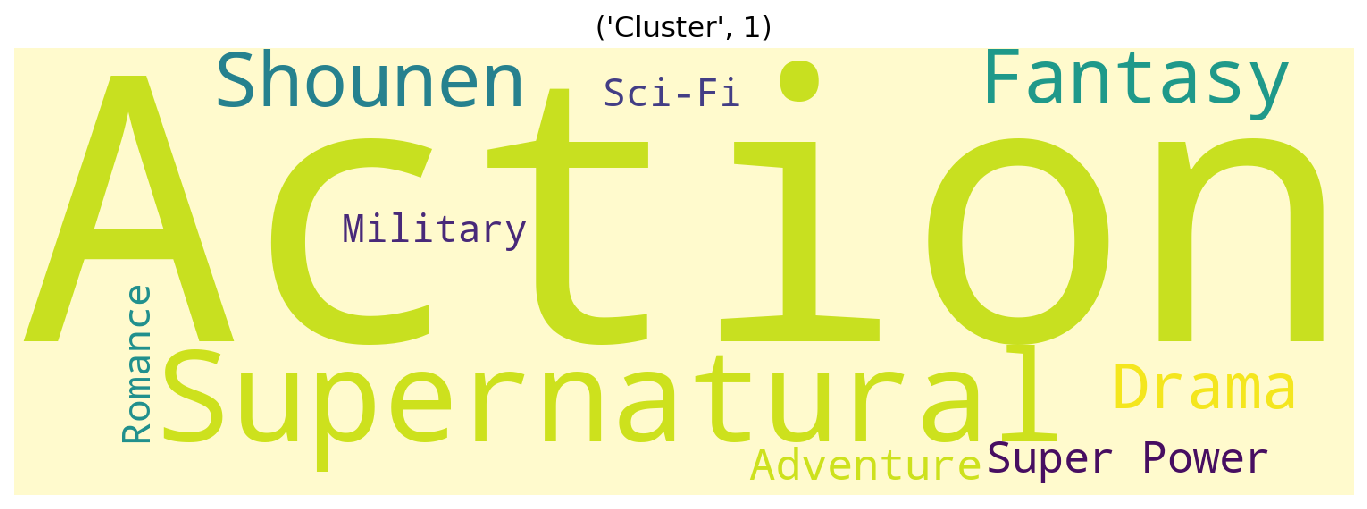

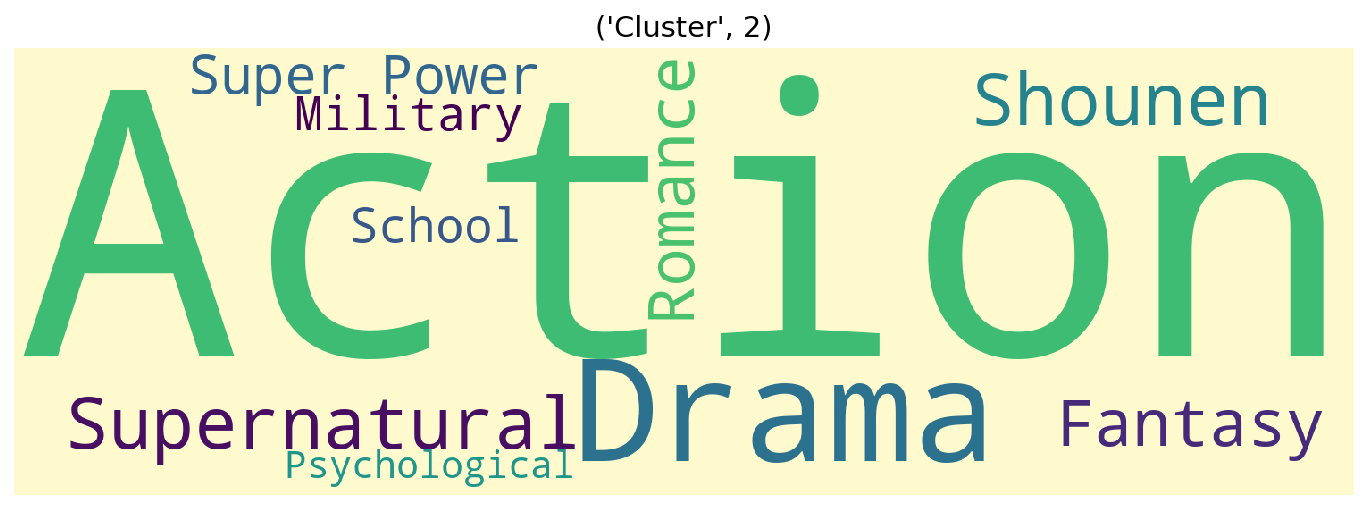

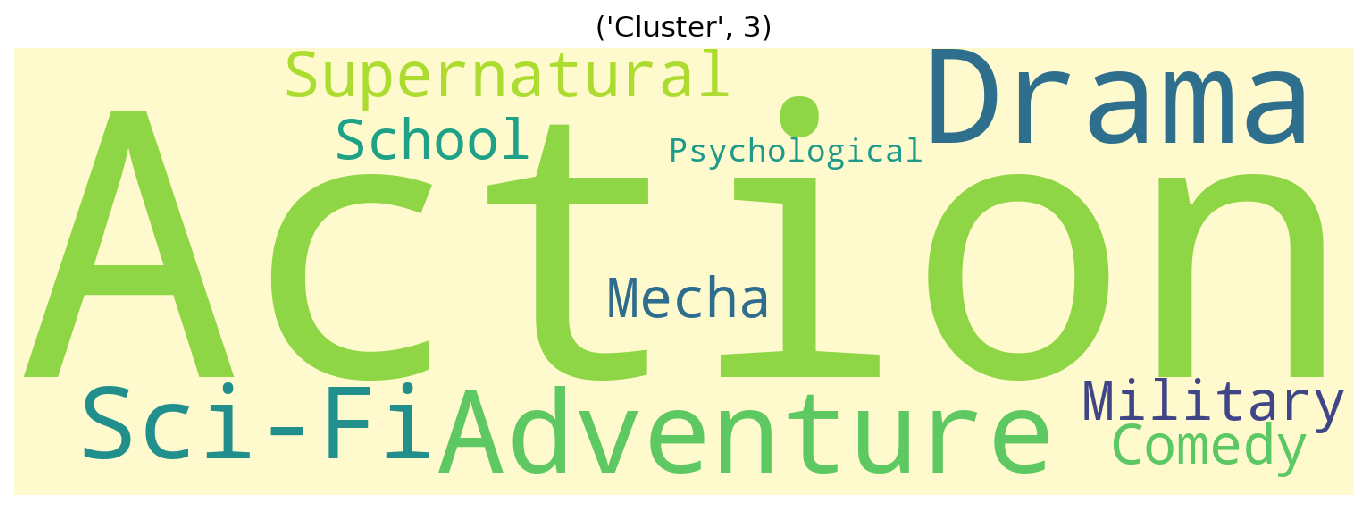

In [32]:
favorite_genre = list()
for i in range(best_k):
    animelist = list(cluster[i].sort_values(ascending = False)[0:15].index)
    data = pd.DataFrame()

    data['genre'], data['episode'], data['rating'], data['member'] = createAnimeInfoList(animelist)
    data.iloc[:, 1:4] = data.iloc[:, 1:4].astype(int) # change to numeric object to integer
    keyword_occurences, dum = count_word(data, 'genre', set_keywords)
    favorite_genre.append(keyword_occurences[0:5])
    
    name = "Cluster", (i + 1)
    makeCloud(keyword_occurences[0:10], name, "lemonchiffon")

In [33]:
list_rank = list()
for i in range(best_k):
    cluster_x = cluster[i].sort_values(ascending = False)[0:15].index
    for j in user_anime[user_anime['cluster'] == i].index.values:
        list_user_rank = list()
        
        user_x = user_anime.loc[[j]]
        done = list(user_x.apply(lambda row: row[row == 1].index, axis = 1).values[0])
        recom_x = cluster[i][~cluster[i].index.isin(done) == True].sort_values(ascending = False)[0:15].index
        for k in range(len(cluster_x)):
            if cluster_x[k] == recom_x[k]:
                list_user_rank.append(1)
            else:
                list_user_rank.append(0)
                
        list_rank.append(list_user_rank)

In [34]:
def mean_reciprocal_rank(rs):
    rs = (np.asarray(r).nonzero()[0] for r in rs)
    return np.mean([1. / (r[0] + 1) if r.size else 0. for r in rs]) 

In [35]:
mean_reciprocal_rank(list_rank)

0.5619

In [36]:
uid = 100
user_100 = user_anime.iloc[[uid - 1]]
user_clust = user_100['cluster'].values[0]
done = list(user_100.apply(lambda row: row[row == 1].index, axis = 1).values[0])
recom_100 = cluster[user_clust][~cluster[user_clust].index.isin(done) == True].sort_values(ascending = False)[0:15]
recom_100

name
Death Note                            0.352547
Shingeki no Kyojin                    0.270257
Code Geass: Hangyaku no Lelouch       0.213500
Fullmetal Alchemist: Brotherhood      0.204020
Code Geass: Hangyaku no Lelouch R2    0.187966
Sen to Chihiro no Kamikakushi         0.179750
Fullmetal Alchemist                   0.179118
Angel Beats!                          0.165971
Elfen Lied                            0.158134
Naruto                                0.157755
Ouran Koukou Host Club                0.147137
Toradora!                             0.139426
Steins;Gate                           0.133359
Mirai Nikki (TV)                      0.133106
Howl no Ugoku Shiro                   0.131842
dtype: float64

In [37]:
uid = 200
user_200 = user_anime.iloc[[uid - 1]]
user_clust = user_200['cluster'].values[0]
done = list(user_200.apply(lambda row: row[row == 1].index, axis = 1).values[0])
recom_200 = cluster[user_clust][~cluster[user_clust].index.isin(done) == True].sort_values(ascending = False)[0:15]
recom_200

name
Sword Art Online                    0.208950
Fullmetal Alchemist: Brotherhood    0.204020
Angel Beats!                        0.165971
Elfen Lied                          0.158134
Naruto                              0.157755
Ouran Koukou Host Club              0.147137
Toradora!                           0.139426
Mirai Nikki (TV)                    0.133106
Tengen Toppa Gurren Lagann          0.127797
Clannad                             0.121603
No Game No Life                     0.116294
Cowboy Bebop                        0.115915
Clannad: After Story                0.115156
Ao no Exorcist                      0.113766
Tokyo Ghoul                         0.106560
dtype: float64

In [38]:
#======================================================================================================================

In [39]:
airing = pd.read_csv('dataset/airing.csv')
display(airing.head(3))
print('Shape:', airing.shape)

,anime_id,name,genre,type,episode,rating,members,status,date
0,NaN,Kimetsu no Yaiba Movie: Mugen Ressha-hen,"Action, Historical, Demons, Supernatural, Shounen",Movie,1.0,8.68,263080,Airing,12/14/2020
1,NaN,Haikyuu!!: To the Top 2nd Season,"Comedy, Sports, Drama, School, Shounen",TV,12.0,8.54,247481,Airing,12/14/2020
2,NaN,Tian Guan Ci Fu,"Action, Adventure, Historical, Supernatural, D...",ONA,11.0,8.53,26505,Airing,12/14/2020


Shape: (116, 9)


In [40]:
airing.isna().sum()

anime_id    116
name          0
genre         0
type          0
episode      27
rating       46
members       0
status        0
date          0
dtype: int64

In [41]:
airing = airing.dropna(subset= ['rating', 'episode'])
airing['anime_id'] = airing.index + 1
display(airing.head(3))
print('Shape:', airing.shape)

,anime_id,name,genre,type,episode,rating,members,status,date
0,1,Kimetsu no Yaiba Movie: Mugen Ressha-hen,"Action, Historical, Demons, Supernatural, Shounen",Movie,1.0,8.68,263080,Airing,12/14/2020
1,2,Haikyuu!!: To the Top 2nd Season,"Comedy, Sports, Drama, School, Shounen",TV,12.0,8.54,247481,Airing,12/14/2020
2,3,Tian Guan Ci Fu,"Action, Adventure, Historical, Supernatural, D...",ONA,11.0,8.53,26505,Airing,12/14/2020


Shape: (56, 9)


In [42]:
def getGenre(data):
    genre = []
    for x in data:
        split = x.split(", ")
        genre = list(set(genre) | set(split))
    
    return genre

In [43]:
def strToArray(data):
    genre = []
    for x in data:
        split = x.split(", ")
        genre.append(x)
    
    return genre

In [44]:
genres = getGenre(airing['genre'])
print(genres)

['Music', 'BigFireBird Animation', 'Demons', 'Shounen Ai', 'Horror', 'Drama', 'Thriller', 'Green Monster Team', 'Seinen', 'Magic', 'Romance', 'Comedy', 'Slice of Life', 'Mystery', 'Ecchi', 'Fantasy', 'Shounen', 'Dementia', 'Action', 'Parody', 'Military', 'Adventure', 'Mecha', 'Sci-Fi', 'Historical', 'Shoujo Ai', 'Psychological', 'Supernatural', 'Game', 'School', 'Sports', 'Super Power']


In [45]:
for i in range(best_k):
    fav = [row[0] for row in favorite_genre[i]]
    mask = airing.genre.apply(lambda x: any(item for item in fav if item in x))
    
    df_fav = airing[mask]
    df_fav = df_fav.sort_values(by = 'members', ascending = False)
    
    print('Cluster', i)
    display(df_fav.head(15))
    print('Shape:', df_fav.shape)
    if(i != (best_k - 1)): print('\n\n\n')

Cluster 0


,anime_id,name,genre,type,episode,rating,members,status,date
3,4,Jujutsu Kaisen (TV),"Action, Horror, Demons, Supernatural, School, ...",TV,24.0,8.45,398504,Airing,12/14/2020
0,1,Kimetsu no Yaiba Movie: Mugen Ressha-hen,"Action, Historical, Demons, Supernatural, Shounen",Movie,1.0,8.68,263080,Airing,12/14/2020
1,2,Haikyuu!!: To the Top 2nd Season,"Comedy, Sports, Drama, School, Shounen",TV,12.0,8.54,247481,Airing,12/14/2020
15,16,Dungeon ni Deai wo Motomeru no wa Machigatteir...,"Action, Adventure, Comedy, Romance, Fantasy",TV,12.0,7.51,233072,Airing,12/14/2020
5,6,Tonikaku Kawaii,"Comedy, Romance, Shounen",TV,12.0,8.02,205771,Airing,12/14/2020
13,14,Mahouka Koukou no Rettousei: Raihousha-hen,"Action, Sci-Fi, Supernatural, Magic, Romance, ...",TV,13.0,7.55,158499,Airing,12/14/2020
11,12,Majo no Tabitabi,"Adventure, Magic, Fantasy",TV,12.0,7.59,142434,Airing,12/14/2020
22,23,Higurashi no Naku Koro ni Gou,"Dementia, Horror, Mystery, Psychological, Supe...",TV,24.0,7.25,133655,Airing,12/14/2020
9,10,Akudama Drive,"Action, Sci-Fi",TV,12.0,7.76,131611,Airing,12/14/2020
17,18,Kamisama ni Natta Hi,"Drama, Fantasy",TV,12.0,7.42,124867,Airing,12/14/2020


Shape: (36, 9)




Cluster 1


,anime_id,name,genre,type,episode,rating,members,status,date
3,4,Jujutsu Kaisen (TV),"Action, Horror, Demons, Supernatural, School, ...",TV,24.0,8.45,398504,Airing,12/14/2020
0,1,Kimetsu no Yaiba Movie: Mugen Ressha-hen,"Action, Historical, Demons, Supernatural, Shounen",Movie,1.0,8.68,263080,Airing,12/14/2020
1,2,Haikyuu!!: To the Top 2nd Season,"Comedy, Sports, Drama, School, Shounen",TV,12.0,8.54,247481,Airing,12/14/2020
15,16,Dungeon ni Deai wo Motomeru no wa Machigatteir...,"Action, Adventure, Comedy, Romance, Fantasy",TV,12.0,7.51,233072,Airing,12/14/2020
5,6,Tonikaku Kawaii,"Comedy, Romance, Shounen",TV,12.0,8.02,205771,Airing,12/14/2020
13,14,Mahouka Koukou no Rettousei: Raihousha-hen,"Action, Sci-Fi, Supernatural, Magic, Romance, ...",TV,13.0,7.55,158499,Airing,12/14/2020
11,12,Majo no Tabitabi,"Adventure, Magic, Fantasy",TV,12.0,7.59,142434,Airing,12/14/2020
22,23,Higurashi no Naku Koro ni Gou,"Dementia, Horror, Mystery, Psychological, Supe...",TV,24.0,7.25,133655,Airing,12/14/2020
9,10,Akudama Drive,"Action, Sci-Fi",TV,12.0,7.76,131611,Airing,12/14/2020
17,18,Kamisama ni Natta Hi,"Drama, Fantasy",TV,12.0,7.42,124867,Airing,12/14/2020


Shape: (36, 9)




Cluster 2


,anime_id,name,genre,type,episode,rating,members,status,date
3,4,Jujutsu Kaisen (TV),"Action, Horror, Demons, Supernatural, School, ...",TV,24.0,8.45,398504,Airing,12/14/2020
0,1,Kimetsu no Yaiba Movie: Mugen Ressha-hen,"Action, Historical, Demons, Supernatural, Shounen",Movie,1.0,8.68,263080,Airing,12/14/2020
1,2,Haikyuu!!: To the Top 2nd Season,"Comedy, Sports, Drama, School, Shounen",TV,12.0,8.54,247481,Airing,12/14/2020
15,16,Dungeon ni Deai wo Motomeru no wa Machigatteir...,"Action, Adventure, Comedy, Romance, Fantasy",TV,12.0,7.51,233072,Airing,12/14/2020
13,14,Mahouka Koukou no Rettousei: Raihousha-hen,"Action, Sci-Fi, Supernatural, Magic, Romance, ...",TV,13.0,7.55,158499,Airing,12/14/2020
22,23,Higurashi no Naku Koro ni Gou,"Dementia, Horror, Mystery, Psychological, Supe...",TV,24.0,7.25,133655,Airing,12/14/2020
9,10,Akudama Drive,"Action, Sci-Fi",TV,12.0,7.76,131611,Airing,12/14/2020
20,21,Munou na Nana,"Super Power, Psychological, Supernatural, Thri...",TV,13.0,7.27,111777,Airing,12/14/2020
36,37,"Kimi to Boku no Saigo no Senjou, Aruiwa Sekai ...","Action, Military, Romance, Fantasy",TV,12.0,6.71,110934,Airing,12/14/2020
23,24,Burn the Witch,"Action, Magic, Fantasy, Shounen",Movie,3.0,7.21,104966,Airing,12/14/2020


Shape: (27, 9)


In [46]:
#======================================================================================================================

In [47]:
upcoming = pd.read_csv('dataset/upcoming.csv')
display(upcoming.head(3))
print('Shape:', upcoming.shape)

,anime_id,name,genre,type,episode,rating,members,status,date collect
0,NaN,Shingeki no Kyojin: The Final Season,"Action, Military, Mystery, Super Power, Drama,...",TV,NaN,9.06,315640,Upcoming,12/14/2020
1,NaN,Yakusoku no Neverland 2nd Season,"Sci-Fi, Mystery, Psychological, Thriller, Shounen",TV,NaN,NaN,224777,Upcoming,12/14/2020
2,NaN,Dr. Stone: Stone Wars,"Sci-Fi, Adventure, Shounen",TV,NaN,NaN,183762,Upcoming,12/14/2020


Shape: (72, 9)


In [48]:
upcoming['anime_id'] = upcoming.index + 1
display(upcoming.head(3))
print('Shape:', upcoming.shape)

,anime_id,name,genre,type,episode,rating,members,status,date collect
0,1,Shingeki no Kyojin: The Final Season,"Action, Military, Mystery, Super Power, Drama,...",TV,NaN,9.06,315640,Upcoming,12/14/2020
1,2,Yakusoku no Neverland 2nd Season,"Sci-Fi, Mystery, Psychological, Thriller, Shounen",TV,NaN,NaN,224777,Upcoming,12/14/2020
2,3,Dr. Stone: Stone Wars,"Sci-Fi, Adventure, Shounen",TV,NaN,NaN,183762,Upcoming,12/14/2020


Shape: (72, 9)


In [49]:
genres = getGenre(upcoming['genre'])
print(genres)

['Music', 'Harem', 'Demons', 'Space', 'Shounen Ai', 'Horror', 'Drama', 'Thriller', 'Seinen', 'Samurai', 'Magic', 'Romance', 'Comedy', 'Slice of Life', 'Mystery', 'Shoujo', 'Ecchi', 'Fantasy', 'Shounen', 'Dementia', 'Military', 'Action', 'Parody', 'Adventure', 'Mecha', 'Sci-Fi', 'Historical', 'Shoujo Ai', 'Martial Arts', 'Psychological', 'Supernatural', 'Game', 'School', 'Super Power', 'Sports']


In [50]:
for i in range(best_k):
    fav = [row[0] for row in favorite_genre[i]]
    mask = upcoming.genre.apply(lambda x: any(item for item in fav if item in x))
    
    df_fav = upcoming[mask]
    df_fav = df_fav.sort_values(by = 'members', ascending = False)
    
    print('Cluster', i)
    display(df_fav.head(15))
    print('Shape:', df_fav.shape)
    if(i != (best_k - 1)): print('\n\n\n')

Cluster 0


,anime_id,name,genre,type,episode,rating,members,status,date collect
0,1,Shingeki no Kyojin: The Final Season,"Action, Military, Mystery, Super Power, Drama,...",TV,NaN,9.06,315640,Upcoming,12/14/2020
1,2,Yakusoku no Neverland 2nd Season,"Sci-Fi, Mystery, Psychological, Thriller, Shounen",TV,NaN,NaN,224777,Upcoming,12/14/2020
2,3,Dr. Stone: Stone Wars,"Sci-Fi, Adventure, Shounen",TV,NaN,NaN,183762,Upcoming,12/14/2020
3,4,Tensei shitara Slime Datta Ken 2nd Season,"Comedy, Fantasy",TV,NaN,NaN,181956,Upcoming,12/14/2020
54,55,Evangelion: 3.0+1.0 Thrice Upon a Time,"Action, Sci-Fi, Psychological, Drama, Mecha",Movie,1.0,NaN,148808,Upcoming,12/14/2020
4,5,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,"Psychological, Drama, Thriller, Fantasy",TV,NaN,NaN,124977,Upcoming,12/14/2020
5,6,5-toubun no Hanayome ?,"Harem, Comedy, Romance, School, Shounen",TV,NaN,NaN,119627,Upcoming,12/14/2020
6,7,Beastars 2nd Season,"Slice of Life, Psychological, Drama, Shounen",TV,NaN,NaN,78322,Upcoming,12/14/2020
7,8,Log Horizon: Entaku Houkai,"Action, Game, Adventure, Magic, Fantasy",TV,NaN,NaN,75356,Upcoming,12/14/2020
8,9,Hataraku Saibou!!,"Comedy, Shounen",TV,NaN,NaN,74008,Upcoming,12/14/2020


Shape: (49, 9)




Cluster 1


,anime_id,name,genre,type,episode,rating,members,status,date collect
0,1,Shingeki no Kyojin: The Final Season,"Action, Military, Mystery, Super Power, Drama,...",TV,NaN,9.06,315640,Upcoming,12/14/2020
1,2,Yakusoku no Neverland 2nd Season,"Sci-Fi, Mystery, Psychological, Thriller, Shounen",TV,NaN,NaN,224777,Upcoming,12/14/2020
2,3,Dr. Stone: Stone Wars,"Sci-Fi, Adventure, Shounen",TV,NaN,NaN,183762,Upcoming,12/14/2020
3,4,Tensei shitara Slime Datta Ken 2nd Season,"Comedy, Fantasy",TV,NaN,NaN,181956,Upcoming,12/14/2020
54,55,Evangelion: 3.0+1.0 Thrice Upon a Time,"Action, Sci-Fi, Psychological, Drama, Mecha",Movie,1.0,NaN,148808,Upcoming,12/14/2020
4,5,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,"Psychological, Drama, Thriller, Fantasy",TV,NaN,NaN,124977,Upcoming,12/14/2020
5,6,5-toubun no Hanayome ?,"Harem, Comedy, Romance, School, Shounen",TV,NaN,NaN,119627,Upcoming,12/14/2020
6,7,Beastars 2nd Season,"Slice of Life, Psychological, Drama, Shounen",TV,NaN,NaN,78322,Upcoming,12/14/2020
7,8,Log Horizon: Entaku Houkai,"Action, Game, Adventure, Magic, Fantasy",TV,NaN,NaN,75356,Upcoming,12/14/2020
8,9,Hataraku Saibou!!,"Comedy, Shounen",TV,NaN,NaN,74008,Upcoming,12/14/2020


Shape: (49, 9)




Cluster 2


,anime_id,name,genre,type,episode,rating,members,status,date collect
0,1,Shingeki no Kyojin: The Final Season,"Action, Military, Mystery, Super Power, Drama,...",TV,NaN,9.06,315640,Upcoming,12/14/2020
2,3,Dr. Stone: Stone Wars,"Sci-Fi, Adventure, Shounen",TV,NaN,NaN,183762,Upcoming,12/14/2020
54,55,Evangelion: 3.0+1.0 Thrice Upon a Time,"Action, Sci-Fi, Psychological, Drama, Mecha",Movie,1.0,NaN,148808,Upcoming,12/14/2020
4,5,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,"Psychological, Drama, Thriller, Fantasy",TV,NaN,NaN,124977,Upcoming,12/14/2020
6,7,Beastars 2nd Season,"Slice of Life, Psychological, Drama, Shounen",TV,NaN,NaN,78322,Upcoming,12/14/2020
7,8,Log Horizon: Entaku Houkai,"Action, Game, Adventure, Magic, Fantasy",TV,NaN,NaN,75356,Upcoming,12/14/2020
9,10,Nanatsu no Taizai: Fundo no Shinpan,"Action, Adventure, Supernatural, Magic, Fantas...",TV,NaN,NaN,63203,Upcoming,12/14/2020
12,13,Hataraku Saibou Black (TV),"Action, Seinen",TV,NaN,NaN,50435,Upcoming,12/14/2020
55,56,Princess Principal: Crown Handler 1,"Action, Mystery, Historical",Movie,1.0,NaN,24554,Upcoming,12/14/2020
16,17,World Trigger 2nd Season,"Action, Sci-Fi, Supernatural, School, Shounen",TV,NaN,NaN,23893,Upcoming,12/14/2020


Shape: (34, 9)
